## This is used to generate tests and figures appropriated



In [ ]:

tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()

## Configure your testing using
TestInstance class by init with <br>
TestInstance(parameter_choice(index), start_value, max_value, nbTests)<br>
Then execute runTests and createGraph
<p>
tests = TestInstance(0,10,1,10)
tests.runTests()
tests.createGraph()
</p>

In [203]:
from tqdm import tqdm
import subprocess
import seaborn
%matplotlib inline
%config InlineBackend.figure_format='retina'
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import matplotlib.pyplot as plt

#plt.style.use('seaborn')
class Parameter():
	def __init__(self,name,default_value):
		self.value  = default_value
		self.name = name
		
	def get_default_value(self):
		return self.default_value
	
	def add_endpoint(self, start, value, nbSteps):
		self.default_value = start
		self.value = self.default_value
		self.endpoint = value 
		self.nbSteps = nbSteps
	def __str__(x):
		return x.name + ": "+str(x.value) 
	def __repr__(self):
		return self.__str__()
class IntParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1
		self.value = default_value
	
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = int(self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps)
	def log(self):
		return int(self.default_value + (self.default_value- self.endpoint) * self.it / self.nbSteps)
	
class FloatParameter(Parameter):
	def __init__(self, name, default_value):
		self.name = name 
		self.default_value = default_value
		self.endpoint = None 
		self.it = 1 
		self.value = default_value
	def next(self):
		if(self.endpoint == None):
			return self.default_value
		else: 
			self.it+=1
			self.value = self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps
	def log(self):
		print(self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps)
		return float(self.default_value - (self.default_value- self.endpoint) * self.it / self.nbSteps)

class TestInstance():
	executable_path = "tests"
	separator =" "
	
	varying_param_log = []
	
	def __init__(self,choice, start_value, max_value, nbTests):
		self.possible_parameters = [IntParameter("nbThreads", 8), IntParameter("matrixSize", 800), IntParameter("matrixRep",1000), FloatParameter("blockper", 0.1)]
		self.algorithms = ["ARMPL","RSB","CYTOSIM_ORIGINAL","MatrixSymmetric", "CYTOSIM_NEW" ,"CYTOSIM_TEST"]
		self.choice = choice
		self.max_value = max_value
		self.start_value = start_value
		self.nbTests = nbTests
		self.variating_parameter = self.possible_parameters[choice]
		self.isRun = False
		self.variating_parameter.add_endpoint(self.start_value,max_value, nbTests)#adding trajectory 

		self.results = {}
		for algo in self.algorithms:
			self.results[algo] = []
		self.results[self.variating_parameter.name] = []
	def runTests(self):
		
		for i in tqdm(range(self.nbTests)):
			self.execWith(self.possible_parameters)
			for param in self.possible_parameters:
				param.next()
			self.varying_param_log.append(self.variating_parameter.log())
		
		self.isRun = True
	def execWith(self, parameters):
		print("Running with : "+str(parameters))
		args = [str(param.value) for param in self.possible_parameters]
		command = [self.executable_path] + args
		result = subprocess.run(command, capture_output=True, text=True)
		f = open("res/compute.out")
		f.readline()#skipping first line
		res = f.readline().strip().split(self.separator)
		i = 0
		for algo in self.algorithms:
			self.results[algo].append(int(res[i]))
			i+=1
		self.results[self.variating_parameter.name].append(self.variating_parameter.log())
	def createGraph(self):
			if(self.isRun):
				plt.figure(dpi=100)
				for algo in self.algorithms:
					if(self.results[algo][0] != -1):
						plt.plot(self.results[self.variating_parameter.name], self.results[algo],label=algo)
						plt.title("Computational time in term of "+self.variating_parameter.name)
						plt.legend()
				plt.xlabel(self.variating_parameter.name)
				plt.ylabel("Computational time")
				plt.show()
			else:
				raise Exception("Do not run createGraph before runTests")


  0%|          | 0/5 [00:00<?, ?it/s]

Running with : [nbThreads: 8, matrixSize: 800, matrixRep: 1000, blockper: 0.1]


 20%|██        | 1/5 [00:00<00:00,  4.84it/s]

0.14
0.18
Running with : [nbThreads: 8, matrixSize: 800, matrixRep: 1000, blockper: 0.18]


 40%|████      | 2/5 [00:00<00:00,  4.46it/s]

0.18
0.22
Running with : [nbThreads: 8, matrixSize: 800, matrixRep: 1000, blockper: 0.22]


 60%|██████    | 3/5 [00:00<00:00,  4.02it/s]

0.22
0.26
Running with : [nbThreads: 8, matrixSize: 800, matrixRep: 1000, blockper: 0.26]


 80%|████████  | 4/5 [00:01<00:00,  3.80it/s]

0.26
0.3
Running with : [nbThreads: 8, matrixSize: 800, matrixRep: 1000, blockper: 0.3]


100%|██████████| 5/5 [00:01<00:00,  3.76it/s]

0.3
0.33999999999999997


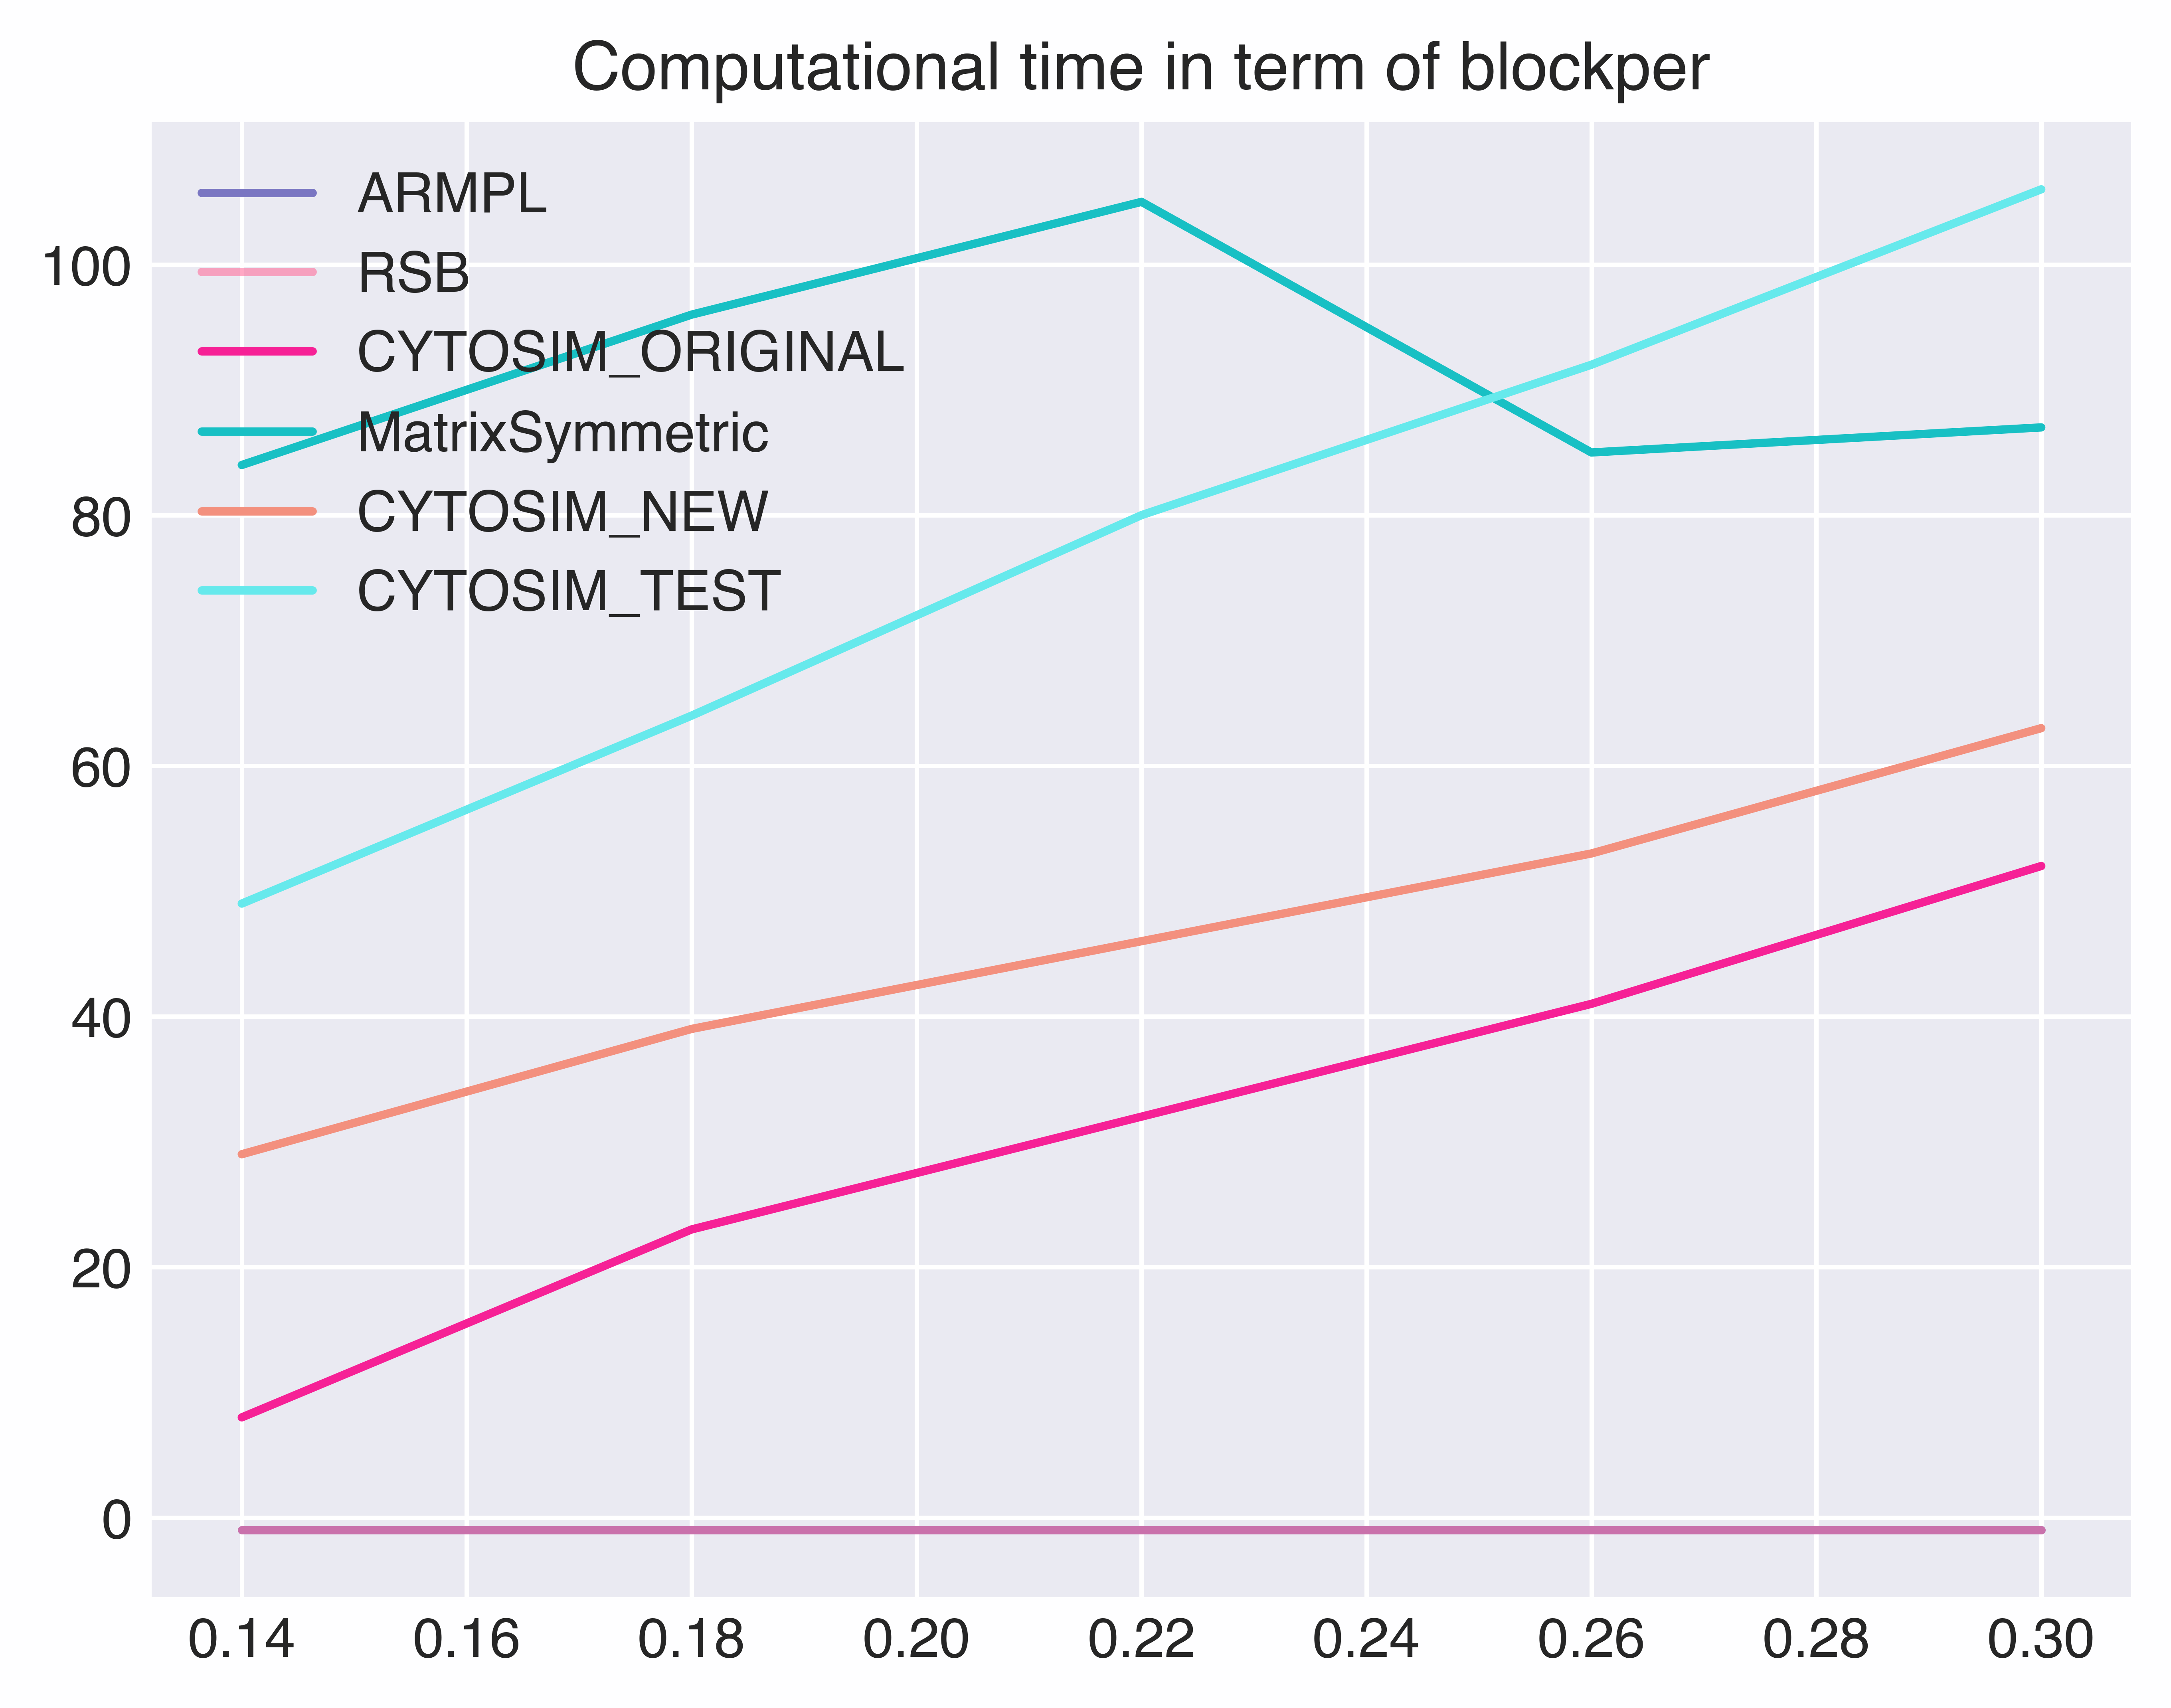

In [204]:

tests = TestInstance(3,0.1,0.3,5)
tests.runTests()
tests.createGraph()

In [202]:
tests.results

{'ARMPL': [-1, -1, -1, -1, -1],
 'RSB': [-1, -1, -1, -1, -1],
 'CYTOSIM_ORIGINAL': [8, 24, 33, 43, 50],
 'MatrixSymmetric': [81, 93, 102, 102, 84],
 'CYTOSIM_NEW': [28, 46, 43, 54, 77],
 'CYTOSIM_TEST': [50, 51, 77, 80, 82],
 'blockper': [0, 0, 0, 0, 0]}

In [ ]:
CHOICE = 3
MAX_VALUE = 1
START_VALUE = 0.1
NB_TESTS = 100